In [ ]:
import pandas as pd  # For data manipulation using DataFrames
from sklearn.linear_model import LinearRegression  # For linear regression modeling
import matplotlib.pyplot as plt  # For data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
import warnings  # For handling warnings in Python
from sklearn.tree import DecisionTreeRegressor  # For decision tree regression modeling
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
from sklearn.neighbors import KNeighborsRegressor  # For K-nearest neighbors regression modeling


In [ ]:
#Python function evaluation_function evaluates the performance of a regression model using various metrics:
def evaluation_function(y, yhat):
    ei = y - yhat

    ei2 = ei ** 2

    MSE = ei2.mean()
    RMSE = MSE ** 0.5

    ei_abs = ei.abs()
    MAE = ei_abs.mean()

    SSR = ((yhat - y.mean())**2).sum()
    SST = ((y - y.mean())**2).sum()
    R2 = SSR / SST

    print("MSE: ", MSE)
    print("RMSE: ", RMSE)
    print("MAE: ", MAE)
    print("R^2: ", R2)

In [ ]:
#Linear Regression

In [ ]:
insurance_data = pd.read_csv('ML Algorithms with Python Assignment (Data).csv')  # Reading the data from a CSV file and storing it in the variable 'insurance_data'

In [ ]:
missing_values = insurance_data.isnull().sum()  # Calculating the sum of missing values in each column
missing_values[missing_values > 0]  # Displaying columns with missing values (where the count of missing values is greater than 0)

Series([], dtype: int64)

In [ ]:
print("List of levels in region: ")  # Printing a message indicating the list of levels in the 'region' column
print(insurance_data["region"].unique())  # Displaying unique values present in the 'region' column

List of levels in region: 
['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
X_total = insurance_data.drop(columns='charges')  # Creating a DataFrame 'X_total' excluding the 'charges' column
y_total = insurance_data['charges']  # Creating a Series 'y_total' containing only the 'charges' column data

In [ ]:
categorical_columns = ['sex', 'region', 'smoker']  # Defining a list of categorical columns
X_total_encoded = pd.get_dummies(X_total, columns=categorical_columns, drop_first=True)
# Creating encoded dummy variables for categorical columns in 'X_total' and storing in 'X_total_encoded'
# 'drop_first=True' drops the first level of each categorical variable to avoid multicollinearity

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_total_encoded, y_total, test_size=0.2, random_state=42)
# Splitting the data into training and testing sets: X_train, X_test, y_train, y_test
# 'test_size=0.2' specifies the proportion of the dataset to include in the test split
# 'random_state=42' sets the seed for random shuffling and ensures reproducibility

In [ ]:
model_insurance = LinearRegression()  # Creating an instance of Linear Regression model

model_insurance.fit(X_train, y_train)  # Fitting the model using training data X_train and y_train

print("Slopes: ", model_insurance.coef_)  # Displaying the coefficients (slopes)
print("Intercept: ", model_insurance.intercept_)  # Displaying the intercept of the model

Slopes:  [ 2.56975706e+02  3.37092552e+02  4.25278784e+02 -1.85916916e+01
 -3.70677326e+02 -6.57864297e+02 -8.09799354e+02  2.36511289e+04]
Intercept:  -11931.21905032667


In [ ]:
y_test_hat = model_insurance.predict(X_test)  # Generating predictions for the test set using the trained model
y_train_hat = model_insurance.predict(X_train)  # Generating predictions for the training set using the trained model

In [ ]:
print("Evaluation for the testing data: ")
evaluation_function(y_test, y_test_hat)  # Evaluating model performance on the testing data

print("Evaluation for the training data: ")
evaluation_function(y_train, y_train_hat)  # Evaluating model performance on the training data

Evaluation for the testing data: 
MSE:  33596915.85136143
RMSE:  5796.284659276271
MAE:  4181.194473753648
R^2:  0.7435552543909298
Evaluation for the training data: 
MSE:  37277681.70201866
RMSE:  6105.545160099847
MAE:  4208.234572492225
R^2:  0.7417255854683346


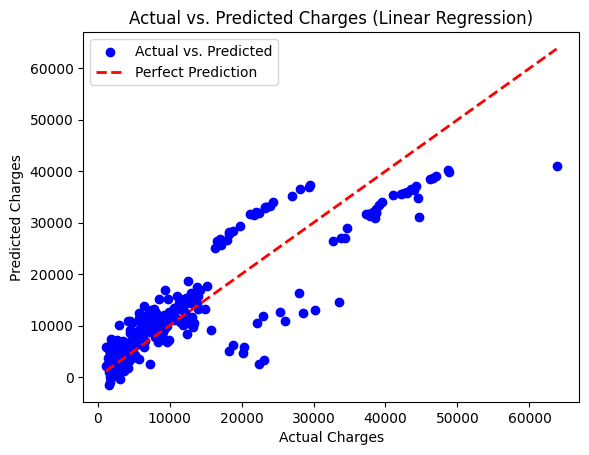

In [ ]:
plt.scatter(y_test, y_test_hat, color='blue', label='Actual vs. Predicted')  # Plotting actual vs. predicted values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')  # Adding a perfect prediction line

plt.title("Actual vs. Predicted Charges (Linear Regression)")  # Setting the title of the plot
plt.xlabel("Actual Charges")  # Setting the label for the x-axis
plt.ylabel("Predicted Charges")  # Setting the label for the y-axis
plt.legend()  # Displaying the legend for the plot
plt.show()  # Showing the plot

In [ ]:
# Quadratic Regression Model

In [ ]:
X_total_encoded = pd.get_dummies(X_total, columns=['sex', 'smoker', 'region'], drop_first=True)
# Creating encoded dummy variables for specified categorical columns in 'X_total' and storing in 'X_total_encoded'
# 'drop_first=True' drops the first level of each categorical variable to avoid multicollinearity

In [ ]:
X_total_encoded['age^2'] = X_total_encoded['age'] ** 2  # Creating a new feature 'age^2' by squaring the 'age' column
X_total_encoded['bmi^2'] = X_total_encoded['bmi'] ** 2  # Creating a new feature 'bmi^2' by squaring the 'bmi' column
X_total_encoded['children^2'] = X_total_encoded['children'] ** 2  # Creating a new feature 'children^2' by squaring the 'children' column

In [ ]:
model_quadratic = LinearRegression()  # Creating an instance of Linear Regression model

model_quadratic.fit(X_total_encoded, y_total)  # Fitting the model using the extended feature set X_total_encoded and y_total

LinearRegression()

In [ ]:
y_total_hat_quadratic = model_quadratic.predict(X_total_encoded)
# Generating predictions for the entire dataset using the quadratic regression model and extended features

In [ ]:
# Print the slopes (coefficients) and intercept of the model
print("Slopes (Coefficients) for Quadratic Regression:")
print(model_quadratic.coef_)
print("Intercept: ", model_quadratic.intercept_)

Slopes (Coefficients) for Quadratic Regression:
[-8.68519501e+01  8.06232056e+02  1.25950045e+03 -1.35396435e+02
  2.38431758e+04 -4.69526040e+02 -9.98691910e+02 -9.96296437e+02
  4.30485199e+00 -7.50877496e+00 -1.80494344e+02]
Intercept:  -13260.706358488322


In [ ]:
# Predictions on the total set for quadratic model
y_total_hat_quadratic = model_quadratic.predict(X_total_encoded)

# Evaluate the quadratic model
print("\nEvaluation for the quadratic model:")
evaluation_function(y_total, y_total_hat_quadratic)


Evaluation for the quadratic model:
MSE:  35865742.462809674
RMSE:  5988.801421220249
MAE:  4210.67307152689
R^2:  0.7552540918873276


In [ ]:
#Droping the categorical columns and perform a regression

In [ ]:
# Drop categorical columns
X_total_numeric = X_total.drop(columns=['sex', 'smoker', 'region'])

In [ ]:
X_train_numeric, X_test_numeric, y_train_numeric, y_test_numeric = train_test_split(
    X_total_numeric, y_total, test_size=0.2, random_state=42
)

In [ ]:
# Train a linear regression model on numeric features
model2 = LinearRegression()
model2.fit(X_train_numeric, y_train_numeric)


LinearRegression()

In [ ]:
# Predictions on the testing set
y_test_hat_numeric = model2.predict(X_test_numeric)

In [ ]:
# Evaluate the numeric model
print("Evaluation for the numeric model:")
evaluation_function(y_test_numeric, y_test_hat_numeric)

Evaluation for the numeric model:
MSE:  131201335.64669803
RMSE:  11454.315153980095
MAE:  9181.311632897381
R^2:  0.09975754282966814


In [ ]:

#Piecewise Regression

In [ ]:
print(insurance_data["sex"].unique())  # Displaying unique values in the 'sex' column
print(insurance_data["children"].unique())  # Displaying unique values in the 'children' column
print(insurance_data["smoker"].unique())  # Displaying unique values in the 'smoker' column
print(insurance_data["region"].unique())  # Displaying unique values in the 'region' column

['female' 'male']
[0 1 3 2 5 4]
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
# Read the dataset
insurance_data = pd.read_csv('ML Algorithms with Python Assignment (Data).csv')

# Suppress warnings
warnings.filterwarnings("ignore")

# Create a function to perform piecewise regression
def piecewise_regression(data):
    # Get unique combinations of 'sex', 'children', 'smoker', and 'region'
    unique_combinations = data[['sex', 'children', 'smoker', 'region']].drop_duplicates()

    # Initialize an empty list to store regression models
    regression_models = []

    # Loop through unique combinations and fit a regression model for each
    for index, row in unique_combinations.iterrows():
        subset = data[
            (data['sex'] == row['sex']) &
            (data['children'] == row['children']) &
            (data['smoker'] == row['smoker']) &
            (data['region'] == row['region'])
        ]

        X = subset[['age', 'bmi']]
        y = subset['charges']

        # Fit a linear regression model
        model = LinearRegression()
        model.fit(X, y)

        # Append the model and combination to the list
        regression_models.append((model, row))

    return regression_models

# Call the function to get regression models for each combination
regression_models = piecewise_regression(insurance_data)

# Create a function to predict using the combined model
def combined_predict(model_list, data):
    predictions = []

    # Loop through the data and apply the appropriate model
    for _, row in data.iterrows():
        for model, conditions in model_list:
            if (row['sex'] == conditions['sex']) and \
               (row['children'] == conditions['children']) and \
               (row['smoker'] == conditions['smoker']) and \
               (row['region'] == conditions['region']):
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore")
                    predictions.append(model.predict([[row['age'], row['bmi']]])[0])
                break

    return predictions

# Predict using the combined model
combined_predictions = combined_predict(regression_models, insurance_data)

# Evaluate the performance of the combined model
evaluation_function(insurance_data['charges'], combined_predictions)


MSE:  18435908.6037365
RMSE:  4293.705695985287
MAE:  2508.702834669623
R^2:  0.8741943458222606


In [ ]:
#Decision Tree:

In [ ]:
# Create a function to encode categorical variables
def encode_categorical(data):
    encoded_data = data.copy()
    label_encoders = {}

    categorical_cols = ['sex', 'smoker', 'region']

    for col in categorical_cols:
        label_encoders[col] = LabelEncoder()
        encoded_data[col] = label_encoders[col].fit_transform(encoded_data[col])

    return encoded_data, label_encoders

# Encode categorical variables
encoded_insurance_data, encoders = encode_categorical(insurance_data)

# Create a function to perform Decision Tree regression
def decision_tree_regression(data):
    X = data[['age', 'bmi', 'sex', 'children', 'smoker', 'region']]
    y = data['charges']

    # Initialize Decision Tree Regressor
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X, y)

    return model

# Call the function to get Decision Tree model
decision_tree_model = decision_tree_regression(encoded_insurance_data)

# Predict using Decision Tree model
decision_tree_predictions = decision_tree_model.predict(encoded_insurance_data[['age', 'bmi', 'sex', 'children', 'smoker', 'region']])

# Evaluate the performance of the Decision Tree model
evaluation_function(encoded_insurance_data['charges'], decision_tree_predictions)

MSE:  195318.62719663917
RMSE:  441.9486703188948
MAE:  23.64917144992526
R^2:  0.9986671561355761


In [ ]:
#K-Nearest Neighbors (KNN):

In [ ]:
# Create a function to encode categorical variables
def encode_categorical(data):
    encoded_data = data.copy()
    label_encoders = {}

    categorical_cols = ['sex', 'smoker', 'region']

    for col in categorical_cols:
        label_encoders[col] = LabelEncoder()
        encoded_data[col] = label_encoders[col].fit_transform(encoded_data[col])

    return encoded_data, label_encoders

# Encode categorical variables
encoded_insurance_data, encoders = encode_categorical(insurance_data)

# Create a function to perform KNN regression
def knn_regression(data):
    X = data[['age', 'bmi', 'sex', 'children', 'smoker', 'region']]
    y = data['charges']

    # Initialize KNN Regressor
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(X, y)

    return model

# Call the function to get KNN model
knn_model = knn_regression(encoded_insurance_data)

# Predict using KNN model
knn_predictions = knn_model.predict(encoded_insurance_data[['age', 'bmi', 'sex', 'children', 'smoker', 'region']])

# Evaluate the performance of the KNN model
evaluation_function(encoded_insurance_data['charges'], knn_predictions)

MSE:  82773640.19792819
RMSE:  9098.001989334152
MAE:  6147.688959831689
R^2:  0.3214153723512445


In [ ]:
#Piecewise Regression (Unique Combinations)

In [ ]:
# Read the dataset
insurance_data = pd.read_csv('ML Algorithms with Python Assignment (Data).csv')

# Create a function to perform piecewise regression
def piecewise_regression(data):
    # Get unique combinations of 'sex', 'children', 'smoker', and 'region'
    unique_combinations = data[['sex', 'children', 'smoker', 'region']].drop_duplicates()

    # Initialize an empty dictionary to store regression models
    regression_models = {}

    # Loop through unique combinations and fit a regression model for each
    for index, row in unique_combinations.iterrows():
        subset = data[
            (data['sex'] == row['sex']) &
            (data['children'] == row['children']) &
            (data['smoker'] == row['smoker']) &
            (data['region'] == row['region'])
        ]

        X = subset[['age', 'bmi']]
        y = subset['charges']

        # Fit a linear regression model
        model = LinearRegression()
        model.fit(X, y)

        # Store the model in the dictionary with the combination as the key
        regression_models[tuple(row)] = model

    return regression_models

# Call the function to get regression models for each combination
regression_models = piecewise_regression(insurance_data)

# Evaluate the performance of each model
for combination, model in regression_models.items():
    print(f"\nEvaluation for combination {combination}:")
    yhat = model.predict(insurance_data[(insurance_data['sex'] == combination[0]) &
                                         (insurance_data['children'] == combination[1]) &
                                         (insurance_data['smoker'] == combination[2]) &
                                         (insurance_data['region'] == combination[3])][['age', 'bmi']])
    evaluation_function(insurance_data[(insurance_data['sex'] == combination[0]) &
                                       (insurance_data['children'] == combination[1]) &
                                       (insurance_data['smoker'] == combination[2]) &
                                       (insurance_data['region'] == combination[3])]['charges'], yhat)



Evaluation for combination ('female', 0, 'yes', 'southwest'):
MSE:  20714077.71510913
RMSE:  4551.272098557625
MAE:  3821.657901312335
R^2:  0.8339233319031729

Evaluation for combination ('male', 1, 'no', 'southeast'):
MSE:  32379843.04593339
RMSE:  5690.328904899381
MAE:  3400.516353599067
R^2:  0.2172948787140789

Evaluation for combination ('male', 3, 'no', 'southeast'):
MSE:  15243202.591216205
RMSE:  3904.254421937203
MAE:  2309.381959121751
R^2:  0.5449661147678004

Evaluation for combination ('male', 0, 'no', 'northwest'):
MSE:  19268775.93052978
RMSE:  4389.62138806182
MAE:  2348.02744391676
R^2:  0.45860055792456483

Evaluation for combination ('female', 0, 'no', 'southeast'):
MSE:  22614709.18113956
RMSE:  4755.492527713565
MAE:  2937.377294056367
R^2:  0.48716946837420894

Evaluation for combination ('female', 1, 'no', 'southeast'):
MSE:  17024294.89944509
RMSE:  4126.050763071765
MAE:  2438.015847281034
R^2:  0.41103726853307415

Evaluation for combination ('female', 3, '